In [2]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf


In [12]:
# clustering.py
data = pd.read_csv('GOOGL.csv')


# Drop the 'Date' column correctly
data.drop('Date', axis=1, inplace=True)  # Specify axis=1 to drop a column

# Calculate correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)  # Display the correlation matrix

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999915  0.999902  0.999808   0.999808 -0.453884
High       0.999915  1.000000  0.999877  0.999903   0.999903 -0.452855
Low        0.999902  0.999877  1.000000  0.999914   0.999914 -0.455447
Close      0.999808  0.999903  0.999914  1.000000   1.000000 -0.454252
Adj Close  0.999808  0.999903  0.999914  1.000000   1.000000 -0.454252
Volume    -0.453884 -0.452855 -0.455447 -0.454252  -0.454252  1.000000


In [33]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
data = pd.read_csv('GOOGL.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data for the desired year (e.g., 2022)
start_date = '2021-01-01'
end_date = '2021-12-31'
data_filtered = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Feature Engineering: Calculate returns and volatility (optional)
data_filtered['Return'] = data_filtered['Close'].pct_change()
data_filtered['Volatility'] = data_filtered['Return'].rolling(window=20).std()
data_filtered.dropna(inplace=True)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data_filtered['Date'],
                open=data_filtered['Open'],
                high=data_filtered['High'],
                low=data_filtered['Low'],
                close=data_filtered['Close'])])

# Update layout for better visualization
fig.update_layout(title='GOOGLE Candlestick Chart for 2022',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9380\957610227.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9380\957610227.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9380\957610227.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Load your data
data = pd.read_csv('GOOGL.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Feature Engineering: Calculate returns and volatility
data['Return'] = data['Close'].pct_change()
data['Volatility'] = data['Return'].rolling(window=20).std()
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['MA_200'] = data['Close'].rolling(window=200).mean()  # 200-day moving average
data.dropna(inplace=True)  # Drop NaN values

# Select relevant features for clustering
features = data[['Return', 'Volatility', 'MA_50', 'MA_200']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [35]:
# Apply K-Means Clustering
optimal_k = 3  # Set this based on your elbow method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Regime'] = kmeans.fit_predict(scaled_features)

# Map regimes to colors
color_map = {0: 'green', 1: 'red', 2: 'blue'}  # Example: 0 = Bull, 1 = Bear, 2 = Sideways
data['Color'] = data['Regime'].map(color_map)

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Load your data
data = pd.read_csv('GOOGL.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Feature Engineering: Calculate returns and volatility
data['Return'] = data['Close'].pct_change()
data['Volatility'] = data['Return'].rolling(window=20).std()
data['MA_50'] = data['Close'].rolling(window=50).mean()  # 50-day moving average
data['MA_200'] = data['Close'].rolling(window=200).mean()  # 200-day moving average
data.dropna(inplace=True)  # Drop NaN values

# Select relevant features for clustering
features = data[['Return', 'Volatility', 'MA_50', 'MA_200']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
optimal_k = 3  # Set this based on your elbow method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Regime'] = kmeans.fit_predict(scaled_features)

# Map regimes to colors
color_map = {0: 'green', 1: 'red', 2: 'blue'}  # Example: 0 = Bull, 1 = Bear, 2 = Sideways
data['Color'] = data['Regime'].map(color_map)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                increasing_line_color='green', 
                decreasing_line_color='red')])



# Update layout for better visualization
fig.update_layout(title='GOOGL Candlestick Chart with Market Regimes',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()


In [ ]:
# Add colored segments based on the regime
for i in range(len(data) - 1):
    fig.add_shape(type="rect",
                  x0=data['Date'].iloc[i],
                  x1=data['Date'].iloc[i + 1],
                  y0=data['Low'].min(),
                  y1=data['High'].max(),
                  fillcolor=data['Color'].iloc[i],
                  opacity=0.2,
                  line_width=0)

# Update layout for better visualization
fig.update_layout(title='GOOGL Candlestick Chart with Market Regimes',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

# Show the figure
fig.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Load your data
data = pd.read_csv('GOOGL.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])



# Filter the data for the desired year (e.g., 2022)
start_date = '2019-12-30'
end_date = '2021-12-31'
data_filtered = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Print the date range of the dataset
print("Date range in dataset:",data_filtered['Date'].min(), "to", data['Date'].max())

# Print the filtered data to check if it's empty
print("Filtered data shape:", data_filtered.shape)
print(data_filtered.head())  # Display the first few rows of the filtered data

# Check if the filtered data is empty
if data_filtered.empty:
    print("No data available for the specified date range.")
else:
    # Feature Engineering: Calculate returns and volatility
    data_filtered['Return'] = data_filtered['Close'].pct_change()
    data_filtered['Volatility'] = data_filtered['Return'].rolling(window=20).std()
    data_filtered['MA_50'] = data_filtered['Close'].rolling(window=50).mean()  # 50-day moving average
    data_filtered['MA_200'] = data_filtered['Close'].rolling(window=200).mean()  # 200-day moving average
    data_filtered.dropna(inplace=True)  # Drop NaN values

    # Select relevant features for clustering
    features = data_filtered[['Return', 'Volatility', 'MA_50', 'MA_200']]

    # Normalize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply K-Means Clustering
    optimal_k = 3  # Set this based on your elbow method analysis
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    data_filtered['Regime'] = kmeans.fit_predict(scaled_features)

    # Map regimes to colors
    color_map = {0: 'green', 1: 'red', 2: 'blue'}  # Example: 0 = Bull, 1 = Bear, 2 = Sideways
    data_filtered['Color'] = data_filtered['Regime'].map(color_map)

    # Create the candlestick chart
    fig = go.Figure(data=[go.Candlestick(x=data_filtered['Date'],
                    open=data_filtered['Open'],
                    high=data_filtered['High'],
                    low=data_filtered['Low'],
                    close=data_filtered['Close'],
                    increasing_line_color='green', 
                    decreasing_line_color='red')])

    # Add colored segments based on the regime
    for i in range(len(data_filtered) - 1):
        fig.add_shape(type="rect",
                      x0=data_filtered['Date'].iloc[i],
                      x1=data_filtered['Date'].iloc[i + 1],
                      y0=data_filtered['Low'].min(),
                      y1=data_filtered['High'].max(),
                      fillcolor=data_filtered['Color'].iloc[i],
                      opacity=0.2,
                      line_width=0)

    # Update layout for better visualization
    fig.update_layout(title='GOOGLE Candlestick Chart with Market Regimes (2021)',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)

    # Show the figure
    fig.show()

Date range in dataset: 2019-12-30 00:00:00 to 2022-03-24 00:00:00
Filtered data shape: (507, 7)
           Date         Open         High          Low        Close  \
3867 2019-12-30  1356.810059  1357.000000  1337.839966  1339.709961   
3868 2019-12-31  1335.790039  1340.660034  1332.130005  1339.390015   
3869 2020-01-02  1348.410034  1368.680054  1346.489990  1368.680054   
3870 2020-01-03  1348.000000  1373.750000  1347.319946  1361.520020   
3871 2020-01-06  1351.630005  1398.319946  1351.000000  1397.810059   

        Adj Close   Volume  
3867  1339.709961   999700  
3868  1339.390015   975700  
3869  1368.680054  1363900  
3870  1361.520020  1170400  
3871  1397.810059  2338400  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15224\1571488602.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15224\1571488602.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15224\1571488602.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Silhouette Score: 0.329


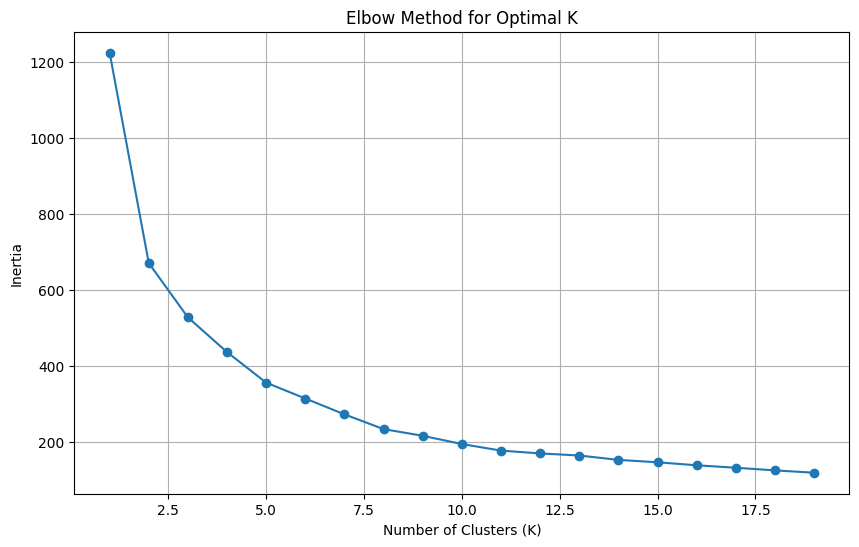

In [16]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, data_filtered['Regime'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Elbow Method to find the optimal number of clusters
inertia = []
k_values = range(1, 20) # Test for 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns

def create_features(df):
    """
    Create features for regime detection
    """
    # Calculate returns and volatility
    df['Returns'] = df['Close'].pct_change()
    df['Volatility'] = df['Returns'].rolling(window=20).std()
    
    # Calculate moving averages
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    
    # Calculate momentum indicators
    df['RSI'] = calculate_rsi(df['Close'])
    df['Trend'] = (df['Close'] - df['MA20']) / df['MA20']
    
    # Drop NaN values
    df.dropna(inplace=True)
    return df

def calculate_rsi(prices, period=14):
    """
    Calculate RSI indicator
    """
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

def detect_regimes(df, n_regimes=8):
    """
    Detect market regimes using multiple features
    """
    # Select features for clustering
    features = ['Returns', 'Volatility', 'RSI', 'Trend']
    X = df[features]
    
    # Scale the features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_regimes, random_state=42)
    df['Regime'] = kmeans.fit_predict(X_scaled)
    
    # Calculate regime characteristics
    regime_chars = []
    for i in range(n_regimes):
        regime_data = df[df['Regime'] == i]
        chars = {
            'Regime': i,
            'Avg_Return': regime_data['Returns'].mean() * 100,
            'Volatility': regime_data['Volatility'].mean() * 100,
            'Avg_RSI': regime_data['RSI'].mean(),
            'Avg_Trend': regime_data['Trend'].mean() * 100
        }
        regime_chars.append(chars)
    
    # Classify regimes based on characteristics
    regime_names = classify_regimes(pd.DataFrame(regime_chars))
    df['Regime_Name'] = df['Regime'].map(regime_names)
    
    return df

def classify_regimes(regime_chars):
    """
    Classify regimes based on their characteristics
    """
    regime_names = {}
    for _, regime in regime_chars.iterrows():
        i = regime['Regime']
        if regime['Avg_Return'] > 0.1 and regime['Volatility'] < regime_chars['Volatility'].median():
            name = "Steady Growth"
        elif regime['Avg_Return'] > 0.2:
            name = "Strong Bullish"
        elif regime['Avg_Return'] < -0.2:
            name = "Strong Bearish"
        elif regime['Volatility'] > regime_chars['Volatility'].quantile(0.75):
            name = "High Volatility"
        elif regime['Avg_RSI'] > 70:
            name = "Overbought"
        elif regime['Avg_RSI'] < 30:
            name = "Oversold"
        elif regime['Avg_Trend'] > 0:
            name = "Mild Bullish"
        else:
            name = "Mild Bearish"
        regime_names[i] = name
    return regime_names

def plot_regimes_with_blocks(df):

    fig = go.Figure()


    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df['Close'],
            name='Price',
            line=dict(color='black', width=1)
        )
    )

    colors = sns.color_palette("husl", n_colors=8).as_hex()

    # Plot regime blocks
    regime_changes = df['Regime'].ne(df['Regime'].shift()).cumsum()
    
    for regime_num in range(1, regime_changes.max() + 1):
        regime_data = df[regime_changes == regime_num]
        if len(regime_data) > 0:
            regime_name = regime_data['Regime_Name'].iloc[0]
            color = colors[regime_data['Regime'].iloc[0]]
            
            # Add colored background for regime
            fig.add_vrect(
                x0=regime_data.index[0],
                x1=regime_data.index[-1],
                fillcolor=color,
                opacity=0.2,
                layer="below",
                name=f"Regime: {regime_name}",
                line_width=0,
            )

    # Update layout
    fig.update_layout(
        title='GOOGL Stock Price with Market Regimes',
        xaxis_title='Date',
        yaxis_title='Price',
        showlegend=True,
        height=800,
        hovermode='x unified',
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=1.05
        )
    )
    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(
                        args=[{"visible": [True] * len(fig.data)}],
                        label="Reset",
                        method="update"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=False,
                x=0.11,
                xanchor="left",
                y=1.1,
                yanchor="top"
            ),
        ]
    )

    # Show figure
    fig.show()

            

def get_weekly_regimes(df):
    """
    Get dominant regime for each week
    """
    # Resample to weekly and get the most common regime
    weekly_regimes = df.resample('W')['Regime_Name'].agg(lambda x: x.mode()[0])
    return weekly_regimes

def main():
    # Load data
    gstock_data = pd.read_csv('GOOGL.csv')
    gstock_data['Date'] = pd.to_datetime(gstock_data['Date'])
    
    # Filter data from 2018 onwards
    gstock_data = gstock_data[gstock_data['Date'].dt.year >= 2018].copy()
    gstock_data.set_index('Date', inplace=True)
    
    print(f"\nAnalyzing data from {gstock_data.index.min().strftime('%Y-%m-%d')} to {gstock_data.index.max().strftime('%Y-%m-%d')}")
 
    
    # Create features and detect regimes
    df = create_features(gstock_data)
    df = detect_regimes(df)
    
    # Plot regimes
    plot_regimes_with_blocks(df)
    
    # Get weekly regime classification
    weekly_regimes = get_weekly_regimes(df)

    # Create and display interactive table of weekly regimes
    weekly_df = weekly_regimes.to_frame('Regime')
    weekly_df.index = weekly_df.index.strftime('%Y-%m-%d')
    
    
    # Print weekly regimes
    print("\nWeekly Market Regimes:")
    print("=====================")
    for date, regime in weekly_df.iterrows():
        print(f"Week of {date}: {regime['Regime']}")
    
    
    # Save weekly regimes to CSV
    weekly_df.to_csv('weekly_regimes_2018_onwards.csv')
    print("\nWeekly regimes have been saved to 'weekly_regimes_2018_onwards.csv'")
    
    # Print summary statistics for each regime
    print("\nRegime Summary Statistics:")
    print("========================")
    regime_stats = df.groupby('Regime_Name').agg({
        'Returns': ['mean', 'std'],
        'Close': ['mean', 'count']
    }).round(4)
    
    for regime in regime_stats.index:
        stats = regime_stats.loc[regime]
        print(f"\n{regime}:")
        print(f"Average Return: {stats[('Returns', 'mean')]*100:.2f}%")
        print(f"Return Volatility: {stats[('Returns', 'std')]*100:.2f}%")
        print(f"Average Price: ${stats[('Close', 'mean')]:.2f}")
        print(f"Number of Days: {stats[('Close', 'count')]}")


if __name__ == "__main__":
    main()


Analyzing data from 2018-01-02 to 2022-03-24



Weekly Market Regimes:
Week of 2018-02-04: Steady Growth
Week of 2018-02-11: Strong Bearish
Week of 2018-02-18: Strong Bearish
Week of 2018-02-25: Mild Bearish
Week of 2018-03-04: Strong Bullish
Week of 2018-03-11: Strong Bullish
Week of 2018-03-18: Steady Growth
Week of 2018-03-25: Mild Bearish
Week of 2018-04-01: Strong Bearish
Week of 2018-04-08: Strong Bearish
Week of 2018-04-15: Mild Bearish
Week of 2018-04-22: Strong Bullish
Week of 2018-04-29: Mild Bearish
Week of 2018-05-06: Mild Bearish
Week of 2018-05-13: Strong Bullish
Week of 2018-05-20: Strong Bullish
Week of 2018-05-27: Steady Growth
Week of 2018-06-03: Mild Bearish
Week of 2018-06-10: Steady Growth
Week of 2018-06-17: Steady Growth
Week of 2018-06-24: Steady Growth
Week of 2018-07-01: Mild Bearish
Week of 2018-07-08: Mild Bearish
Week of 2018-07-15: Mild Bearish
Week of 2018-07-22: Steady Growth
Week of 2018-07-29: Steady Growth
Week of 2018-08-05: Steady Growth
Week of 2018-08-12: Steady Growth
Week of 2018-08-19: Mild